In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Run Decision Tree Regressor model to predict the full price
write a short summery here

In [37]:
# Load the data
df1 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_clean_df_05_07.csv")
df2 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_clean_df_20_06.csv")
df3 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_clean_df_25_06.csv")

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True)

Decision Tree Regressor Results:
   Depth  Train R2  Train RMSE     Train MSE   Train MAE   Test R2  \
0      6  0.809611  174.783406  30549.238892  123.059853  0.808363   
1      8  0.829816  165.248986  27307.227251  115.673673  0.824219   
2     10  0.850509  154.876942  23986.867251  106.628188  0.834923   
3     12  0.877121  140.416370  19716.756929   94.516111  0.848737   

    Test RMSE      Test MSE    Test MAE  
0  175.365074  30752.909042  124.015588  
1  167.953706  28208.447279  118.067341  
2  162.759520  26490.661209  112.887984  
3  155.800842  24273.902279  106.496536  


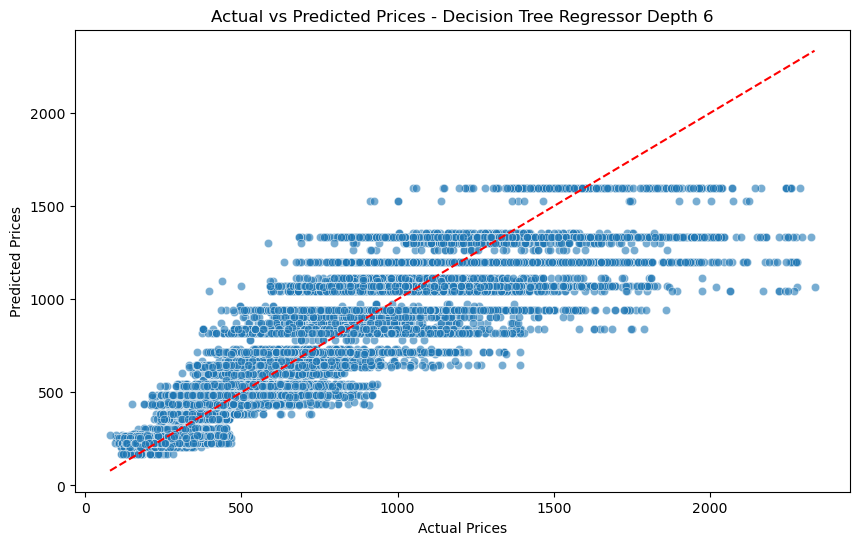

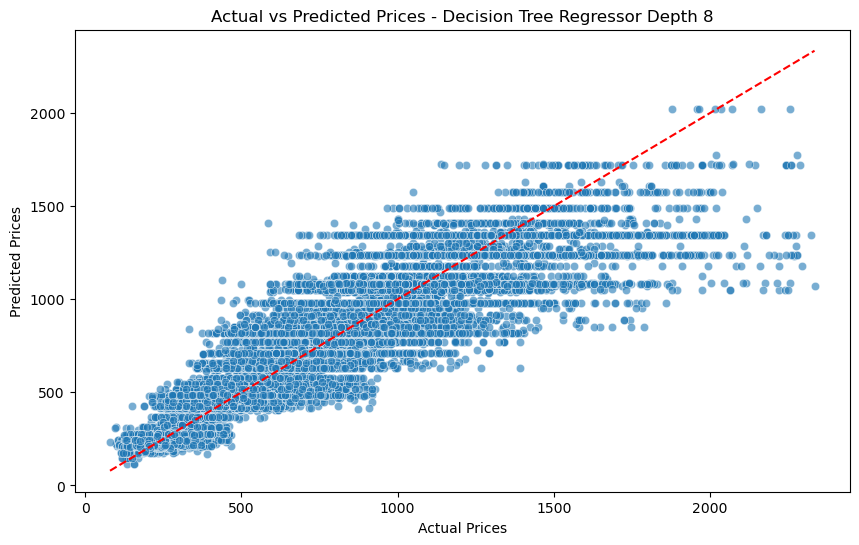

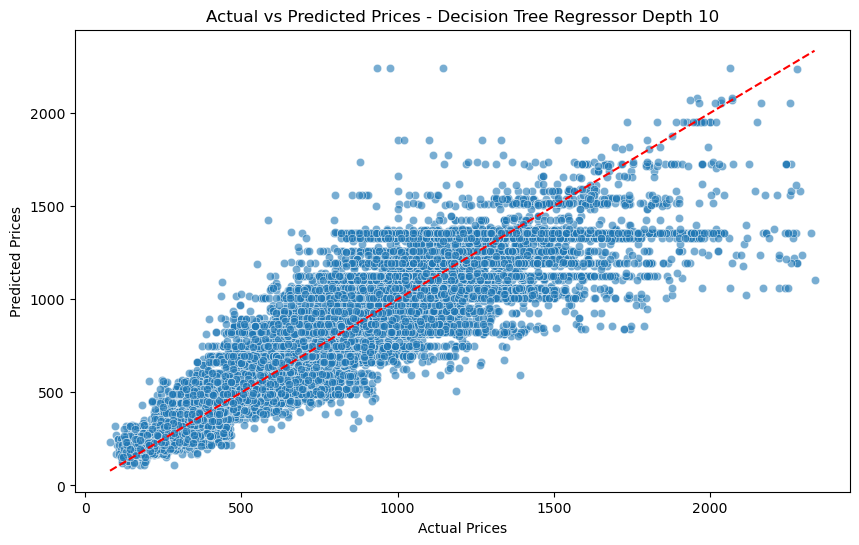

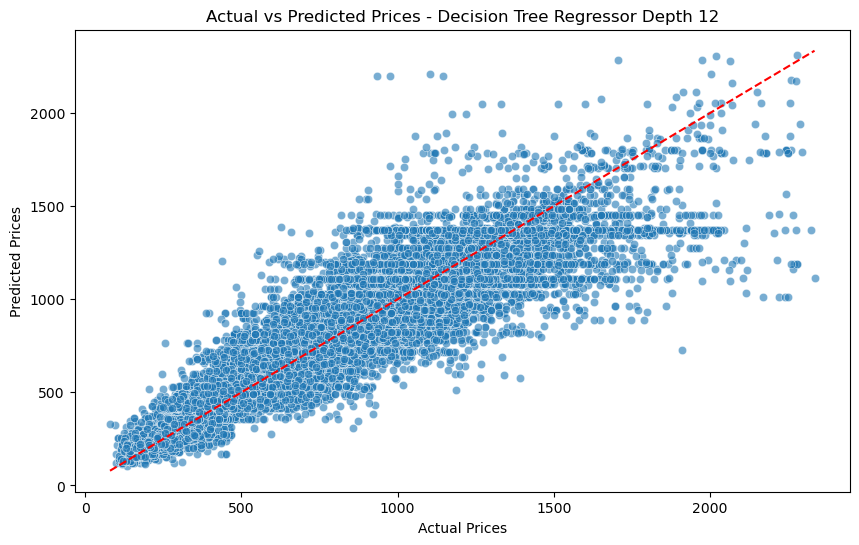

In [38]:
# Keep only numeric columns
df = df.select_dtypes(include=[np.number])

# Remove columns with all NaN values
df = df.dropna(axis=1, how='all')

# Ensure there are no remaining NaN values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Remove columns that are not needed for regression
columns_to_use = ['TTT', 'LOS', 'score',
       'reviews', 'full_price',
       'Free_cancellation', 'No_payment', 'Breakfast', 'Option Member',
       'star_rating', 'location_rating',
       'km_from_center']
df = df[columns_to_use]

# Split the data into train and test sets
X = df.drop(columns=['full_price'])
y = df['full_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models with different depths
depths = [6, 8, 10, 12]
results = []
predictions = {}

for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Training metrics
    train_r2 = r2_score(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    
    # Test metrics
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    results.append({
        'Depth': depth,
        'Train R2': train_r2,
        'Train RMSE': train_rmse,
        'Train MSE': train_mse,
        'Train MAE': train_mae,
        'Test R2': test_r2,
        'Test RMSE': test_rmse,
        'Test MSE': test_mse,
        'Test MAE': test_mae
    })
    
    # Store predictions for plotting
    predictions[f'Depth {depth}'] = (y_test, y_test_pred)

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print("Decision Tree Regressor Results:")
print(results_df)

# Plot actual vs predicted prices for each depth
for model_name, (y_test, y_pred) in predictions.items():
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'Actual vs Predicted Prices - Decision Tree Regressor {model_name}')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.show()

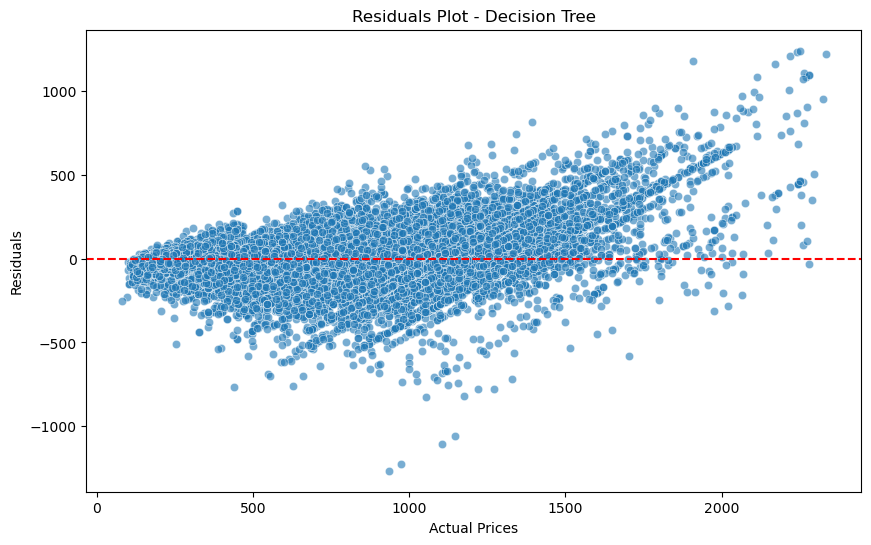

In [39]:
# Residual plot
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title(f'Residuals Plot - Decision Tree')
plt.show()

Error metrics for the additional experiment (Depth 14, TTT split):
Training set - R²: 0.9024234558475634, RMSE: 126.27985961030981, MSE: 15946.602943199556, MAE: 81.64901883899587
Test set - R²: 0.8905577306444743, RMSE: 127.80875765765285, MSE: 16335.078533992635, MAE: 91.26128997204545


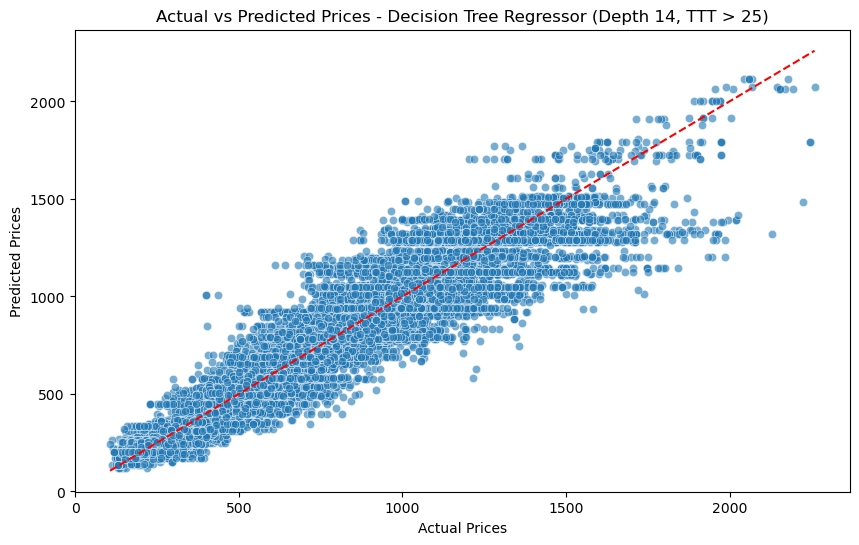

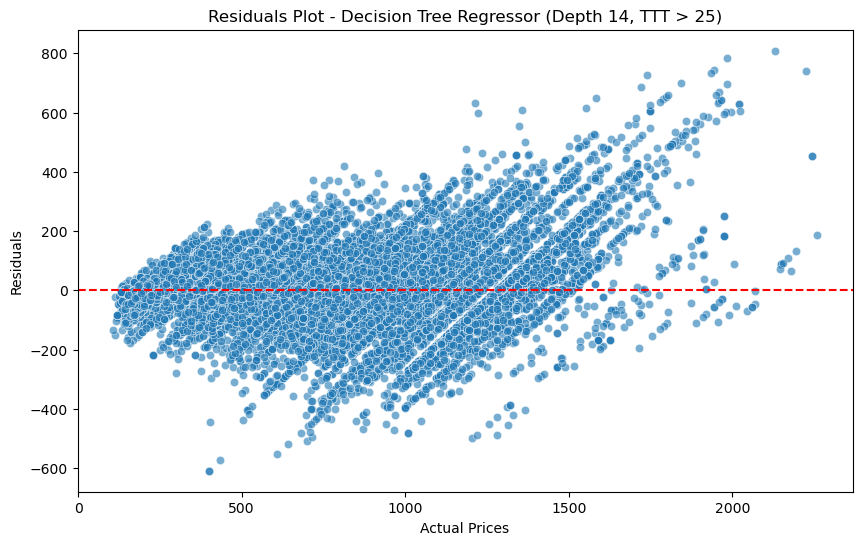

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


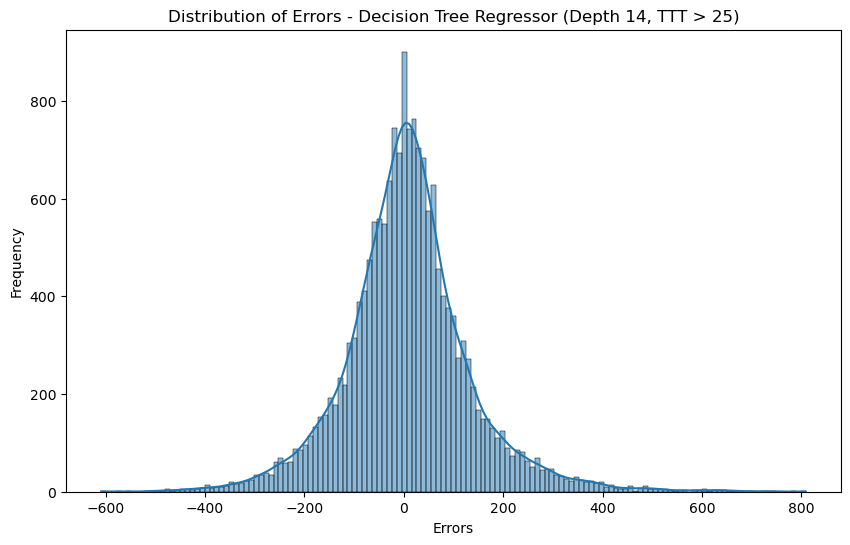

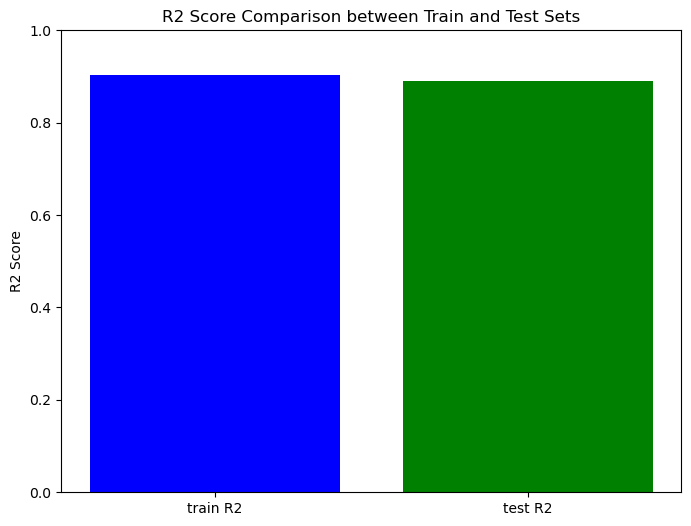

In [41]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Keep only numeric columns
df = df.select_dtypes(include=[np.number])

# Remove columns with all NaN values
df = df.dropna(axis=1, how='all')

# Remove the price column
if 'price_per_night' in df.columns:
    df = df.drop(columns=['price_per_night'])

# Ensure there are no remaining NaN values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


# Additional experiment for depth 14
df_train = df[df['TTT'] <= 25]
df_test = df[df['TTT'] > 25]

X_train_exp = df_train.drop(columns=['full_price'])
y_train_exp = df_train['full_price']
X_test_exp = df_test.drop(columns=['full_price'])
y_test_exp = df_test['full_price']

# Train the model on the new train-test split
model_exp = DecisionTreeRegressor(max_depth=14)
model_exp.fit(X_train_exp, y_train_exp)

# Predictions
y_train_exp_pred = model_exp.predict(X_train_exp)
y_test_exp_pred = model_exp.predict(X_test_exp)

# Calculate error metrics for training set
train_r2_exp = r2_score(y_train_exp, y_train_exp_pred)
train_rmse_exp = mean_squared_error(y_train_exp, y_train_exp_pred, squared=False)
train_mse_exp = mean_squared_error(y_train_exp, y_train_exp_pred)
train_mae_exp = mean_absolute_error(y_train_exp, y_train_exp_pred)

# Calculate error metrics for test set
test_r2_exp = r2_score(y_test_exp, y_test_exp_pred)
test_rmse_exp = mean_squared_error(y_test_exp, y_test_exp_pred, squared=False)
test_mse_exp = mean_squared_error(y_test_exp, y_test_exp_pred)
test_mae_exp = mean_absolute_error(y_test_exp, y_test_exp_pred)

# Print error metrics
print("Error metrics for the additional experiment (Depth 14, TTT split):")
print(f"Training set - R²: {train_r2_exp}, RMSE: {train_rmse_exp}, MSE: {train_mse_exp}, MAE: {train_mae_exp}")
print(f"Test set - R²: {test_r2_exp}, RMSE: {test_rmse_exp}, MSE: {test_mse_exp}, MAE: {test_mae_exp}")

# Plot actual vs predicted prices for depth 14 with new split
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_exp, y=y_test_exp_pred, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices - Decision Tree Regressor (Depth 14, TTT > 25)')
plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()], color='red', linestyle='--')
plt.show()

# Residual plot
residuals_exp = y_test_exp - y_test_exp_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_exp, y=residuals_exp, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residuals Plot - Decision Tree Regressor (Depth 14, TTT > 25)')
plt.show()

# Plot  error distribution for depth 14 with new split
errors_exp = y_test_exp - y_test_exp_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors_exp, kde=True)
plt.xlabel('Errors')
plt.ylabel('Frequency')
plt.title('Distribution of Errors - Decision Tree Regressor (Depth 14, TTT > 25)')
plt.show()


r2_values = [train_r2_exp, test_r2_exp]
labels = ['train R2', 'test R2']

plt.figure(figsize=(8, 6))
plt.bar(labels, r2_values, color=['blue', 'green'])
plt.ylim(0, 1)  
plt.ylabel('R2 Score')
plt.title('R2 Score Comparison between Train and Test Sets')
plt.show()

# Run the model to predict price full price after feature engineering:

In [42]:
# Load the data
df1 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_clean_df_features_engineering_20_06.csv")
df2 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_clean_df_features_engineering_25_06.csv")
df3 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_clean_df_features_engineering_05_07.csv")

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True)

Decision Tree Regressor Results with feature engineering:
   Depth  Train R2  Train RMSE     Train MSE  Train MAE   Test R2   Test RMSE  \
0      6  0.863565  137.040925  18780.215057  98.616925  0.860993  136.877733   
1      8  0.889689  123.224713  15184.329874  88.154551  0.883588  125.260393   
2     10  0.917298  106.695100  11383.844372  75.606739  0.902895  114.402522   
3     12  0.940744   90.313634   8156.552418  61.834184  0.913943  107.698323   
4     13  0.951238   81.927411   6712.100751  54.299665  0.915754  106.558956   
5     14  0.961080   73.193994   5357.360745  46.332148  0.918063  105.088344   

       Test MSE   Test MAE  
0  18735.513740  98.543919  
1  15690.166082  89.582878  
2  13087.936968  82.010072  
3  11598.928844  76.809607  
4  11354.811167  75.776118  
5  11043.560125  74.109148  


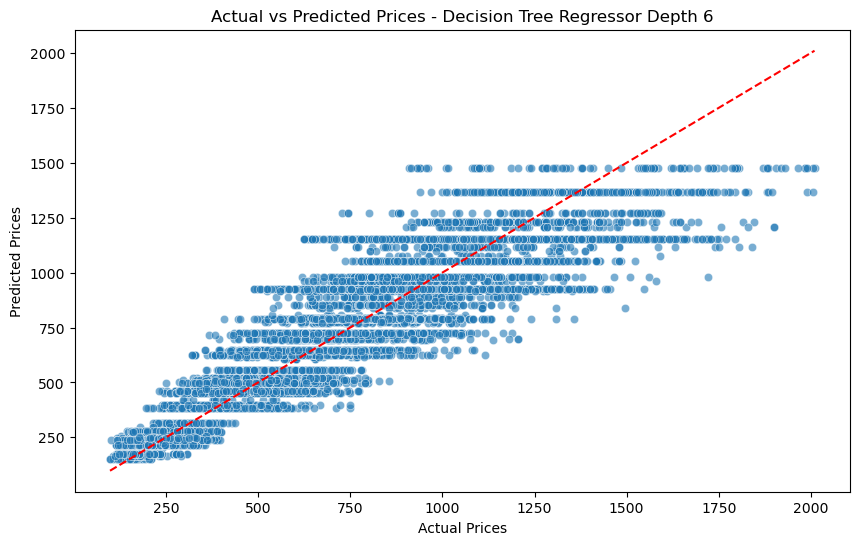

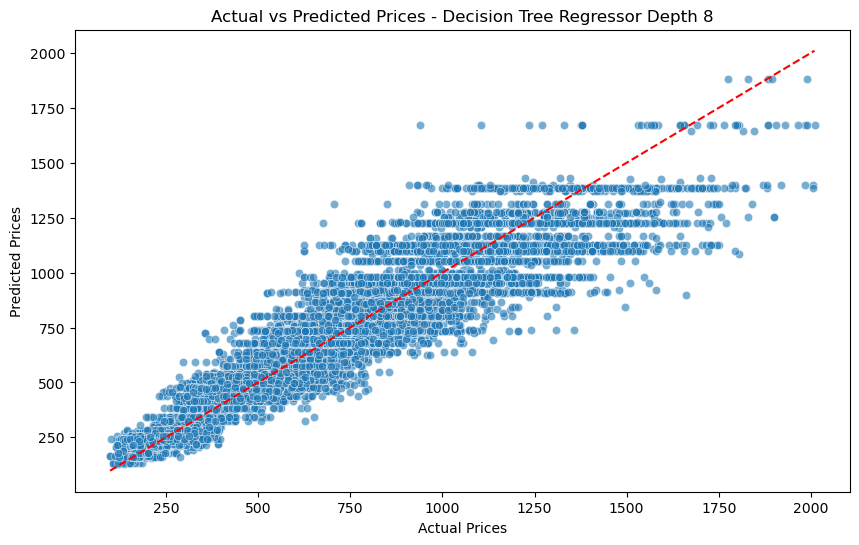

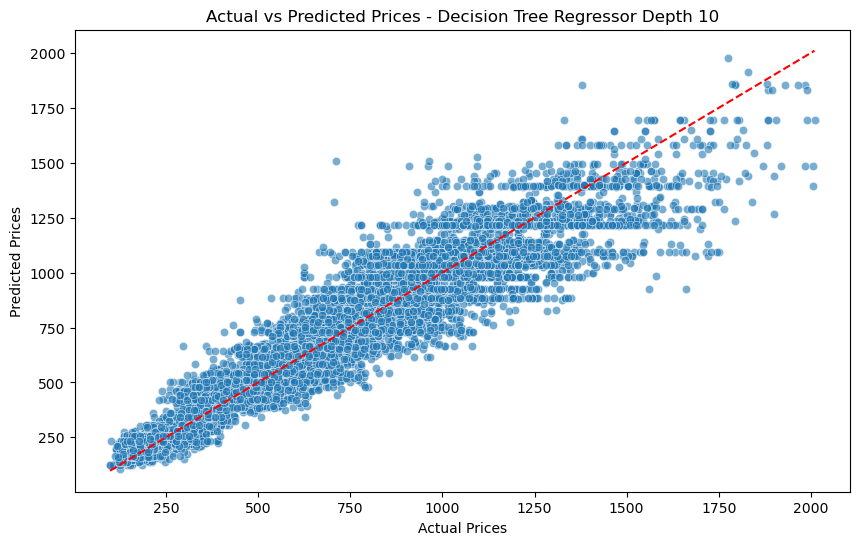

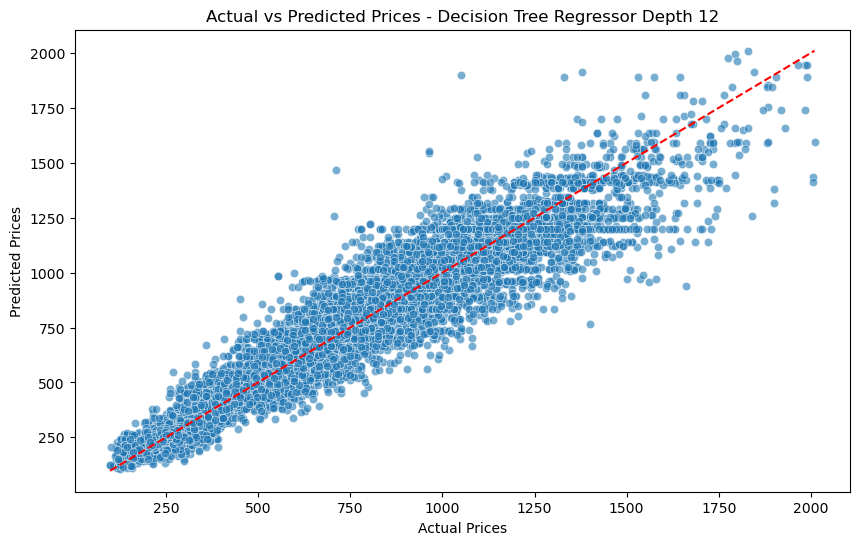

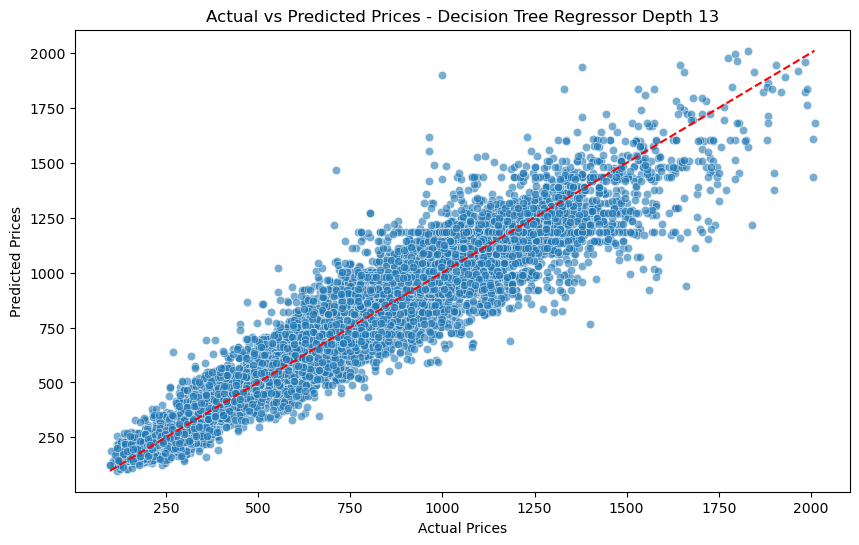

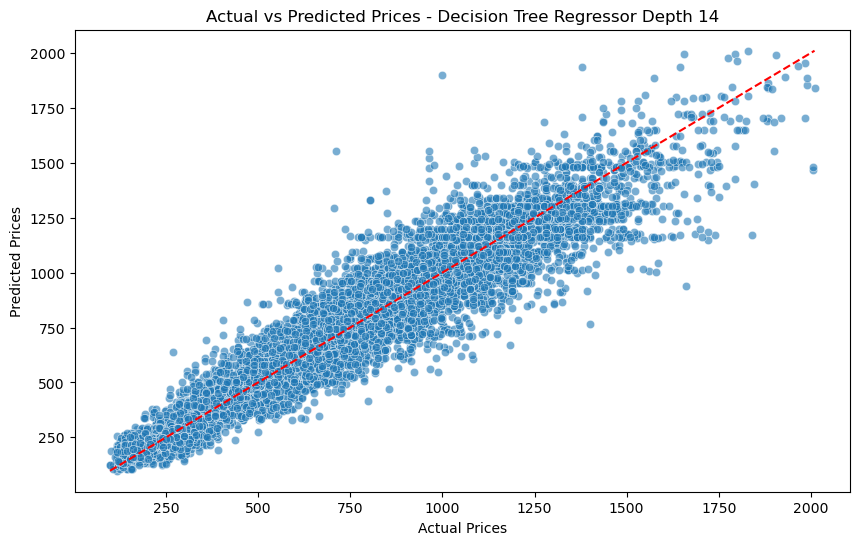

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Merge the dataframes
# df = pd.concat([df1, df2, df3], ignore_index=True)

# Remove columns that are not needed for regression
columns_to_use = ['TTT', 'LOS', 'score',
       'reviews', 'full_price',
       'Free_cancellation', 'No_payment', 'Breakfast', 'Option Member',
       'star_rating', 'location_rating',
       'km_from_center', 'checkin_day', 'checkout_day', 'checkin_day_name_Friday',
       'checkin_day_name_Monday', 'checkin_day_name_Saturday',
       'checkin_day_name_Sunday', 'checkin_day_name_Thursday',
       'checkin_day_name_Tuesday', 'checkin_day_name_Wednesday',
       'checkin_day_name_nan', 'checkout_day_name_Friday',
       'checkout_day_name_Monday', 'checkout_day_name_Saturday',
       'checkout_day_name_Sunday', 'checkout_day_name_Thursday',
       'checkout_day_name_Tuesday', 'checkout_day_name_Wednesday',
       'checkout_day_name_nan', 'period_of_the_month_beginning of the month',
       'period_of_the_month_end of the month',
       'period_of_the_month_middle of the month']
df = df[columns_to_use]

# Keep only numeric columns
df = df.select_dtypes(include=[np.number])

# Remove columns with all NaN values
df = df.dropna(axis=1, how='all')

# Ensure there are no remaining NaN values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Split the data into train and test sets
X = df.drop(columns=['full_price'])
y = df['full_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models with different depths
depths = [6, 8, 10, 12,13,14]
results = []
predictions = {}

for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Training metrics
    train_r2 = r2_score(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    
    # Test metrics
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    results.append({
        'Depth': depth,
        'Train R2': train_r2,
        'Train RMSE': train_rmse,
        'Train MSE': train_mse,
        'Train MAE': train_mae,
        'Test R2': test_r2,
        'Test RMSE': test_rmse,
        'Test MSE': test_mse,
        'Test MAE': test_mae
    })
    
    # Store predictions for plotting
    predictions[f'Depth {depth}'] = (y_test, y_test_pred)

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print("Decision Tree Regressor Results with feature engineering:")
print(results_df)

# Plot actual vs predicted prices for each depth
for model_name, (y_test, y_pred) in predictions.items():
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'Actual vs Predicted Prices - Decision Tree Regressor {model_name}')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.show()

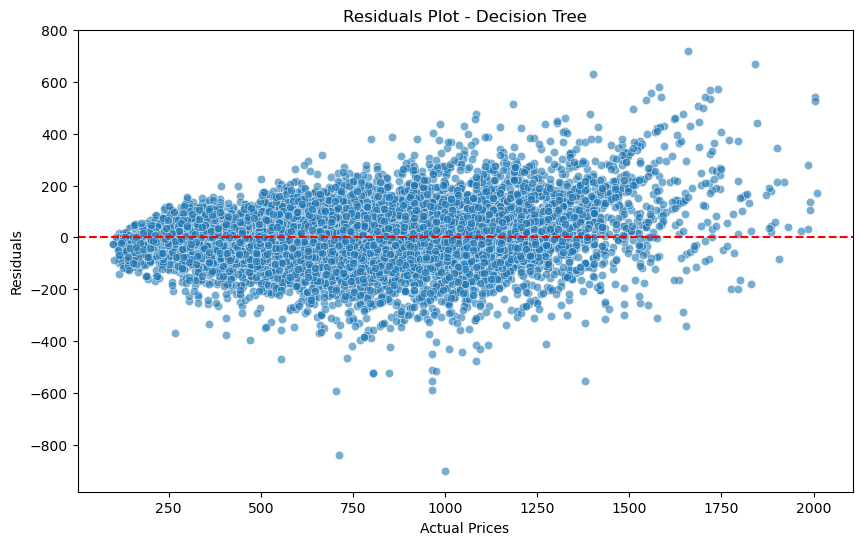

In [44]:
# Residual plot
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title(f'Residuals Plot - Decision Tree')
plt.show()

Error metrics for the additional experiment (Depth 14, TTT split):
Training set - R²: 0.9634009487511273, RMSE: 71.1057729491912, MSE: 5056.030946701932, MAE: 45.598138753021416
Test set - R²: 0.8780601420040286, RMSE: 126.5857370276158, MSE: 16023.948818824703, MAE: 88.92796478292946


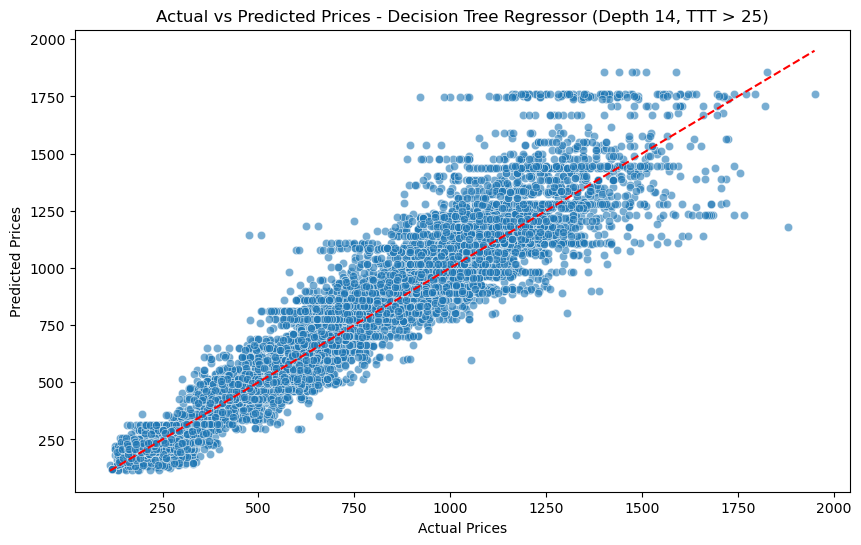

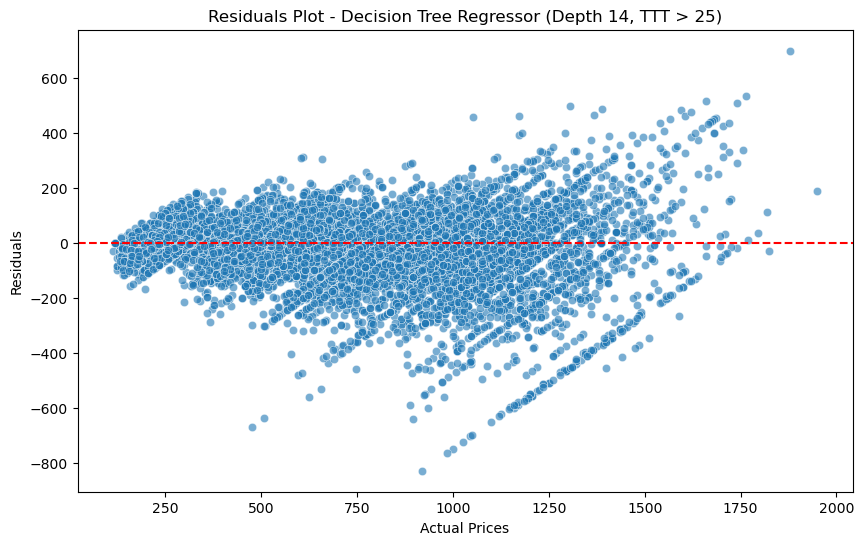

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


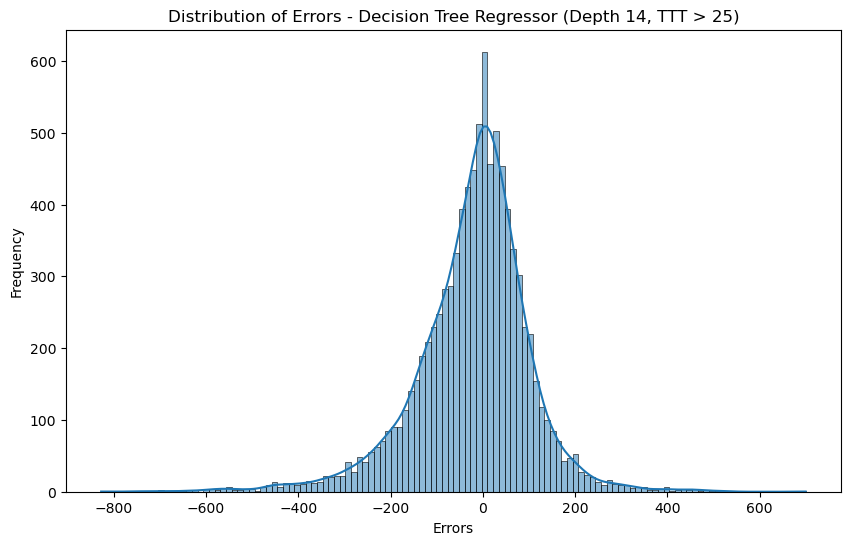

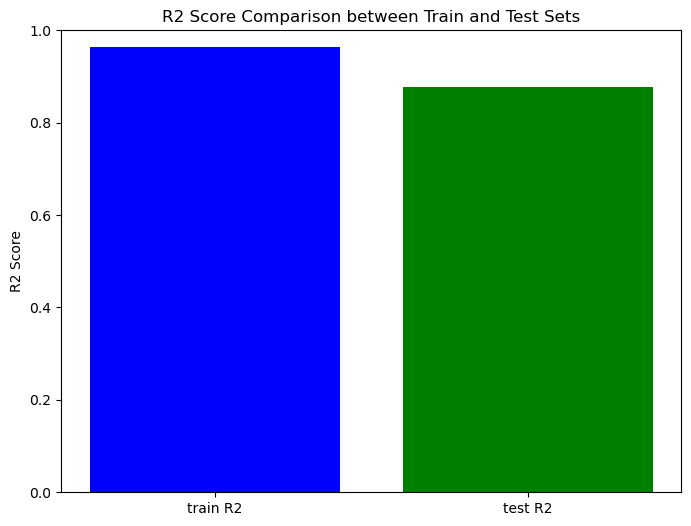

In [45]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Keep only numeric columns
df = df.select_dtypes(include=[np.number])

# Remove columns with all NaN values
df = df.dropna(axis=1, how='all')

# Remove the price column
if 'price_per_night' in df.columns:
    df = df.drop(columns=['price_per_night'])

# Ensure there are no remaining NaN values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


# Additional experiment for depth 14
df_train = df[df['TTT'] <= 25]
df_test = df[df['TTT'] > 25]

X_train_exp = df_train.drop(columns=['full_price'])
y_train_exp = df_train['full_price']
X_test_exp = df_test.drop(columns=['full_price'])
y_test_exp = df_test['full_price']

# Train the model on the new train-test split
model_exp = DecisionTreeRegressor(max_depth=14)
model_exp.fit(X_train_exp, y_train_exp)

# Predictions
y_train_exp_pred = model_exp.predict(X_train_exp)
y_test_exp_pred = model_exp.predict(X_test_exp)

# Calculate error metrics for training set
train_r2_exp = r2_score(y_train_exp, y_train_exp_pred)
train_rmse_exp = mean_squared_error(y_train_exp, y_train_exp_pred, squared=False)
train_mse_exp = mean_squared_error(y_train_exp, y_train_exp_pred)
train_mae_exp = mean_absolute_error(y_train_exp, y_train_exp_pred)

# Calculate error metrics for test set
test_r2_exp = r2_score(y_test_exp, y_test_exp_pred)
test_rmse_exp = mean_squared_error(y_test_exp, y_test_exp_pred, squared=False)
test_mse_exp = mean_squared_error(y_test_exp, y_test_exp_pred)
test_mae_exp = mean_absolute_error(y_test_exp, y_test_exp_pred)

# Print error metrics
print("Error metrics for the additional experiment (Depth 14, TTT split):")
print(f"Training set - R²: {train_r2_exp}, RMSE: {train_rmse_exp}, MSE: {train_mse_exp}, MAE: {train_mae_exp}")
print(f"Test set - R²: {test_r2_exp}, RMSE: {test_rmse_exp}, MSE: {test_mse_exp}, MAE: {test_mae_exp}")

# Plot actual vs predicted prices for depth 14 with new split
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_exp, y=y_test_exp_pred, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices - Decision Tree Regressor (Depth 14, TTT > 25)')
plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()], color='red', linestyle='--')
plt.show()

# Residual plot
residuals_exp = y_test_exp - y_test_exp_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_exp, y=residuals_exp, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residuals Plot - Decision Tree Regressor (Depth 14, TTT > 25)')
plt.show()

# Plot  error distribution for depth 14 with new split
errors_exp = y_test_exp - y_test_exp_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors_exp, kde=True)
plt.xlabel('Errors')
plt.ylabel('Frequency')
plt.title('Distribution of Errors - Decision Tree Regressor (Depth 14, TTT > 25)')
plt.show()


r2_values = [train_r2_exp, test_r2_exp]
labels = ['train R2', 'test R2']

plt.figure(figsize=(8, 6))
plt.bar(labels, r2_values, color=['blue', 'green'])
plt.ylim(0, 1)  
plt.ylabel('R2 Score')
plt.title('R2 Score Comparison between Train and Test Sets')
plt.show()

# Repeat the process but on data after normalization
1. Linear regression on normalized data
2. Linear regression on normalized data with features engineering

In [46]:
# Load the data
df1 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_normalized_data_05_07.csv")
df2 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_normalized_data_20_06.csv")
df3 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_normalized_data_25_06.csv")

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True)

Decision Tree Regressor Results after data normalization:
   Depth  Train R2  Train RMSE  Train MSE  Train MAE   Test R2  Test RMSE  \
0      6  0.853193    0.382709   0.146466   0.276334  0.847851   0.391087   
1      8  0.872857    0.356157   0.126848   0.255230  0.864131   0.369572   
2     10  0.896412    0.321477   0.103348   0.227719  0.879666   0.347802   
3     12  0.921596    0.279682   0.078222   0.193110  0.889651   0.333060   

   Test MSE  Test MAE  
0  0.152949  0.281884  
1  0.136583  0.266437  
2  0.120966  0.249172  
3  0.110929  0.235990  


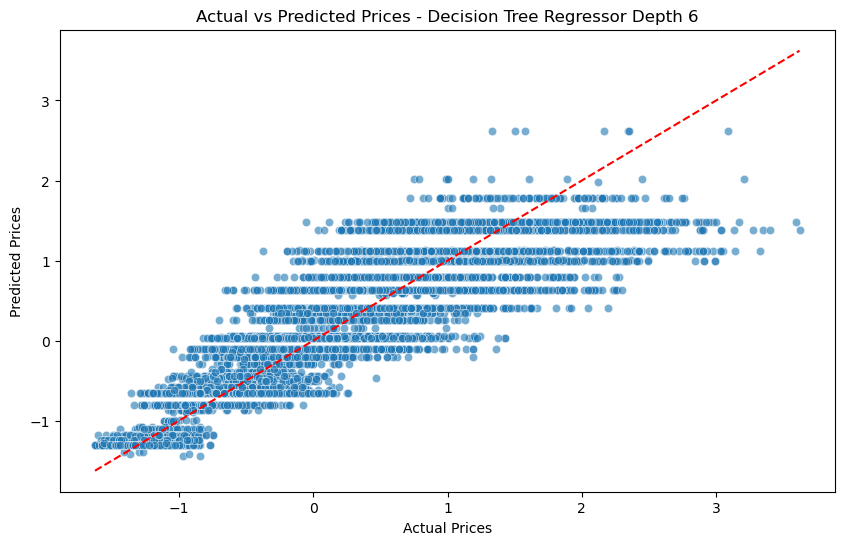

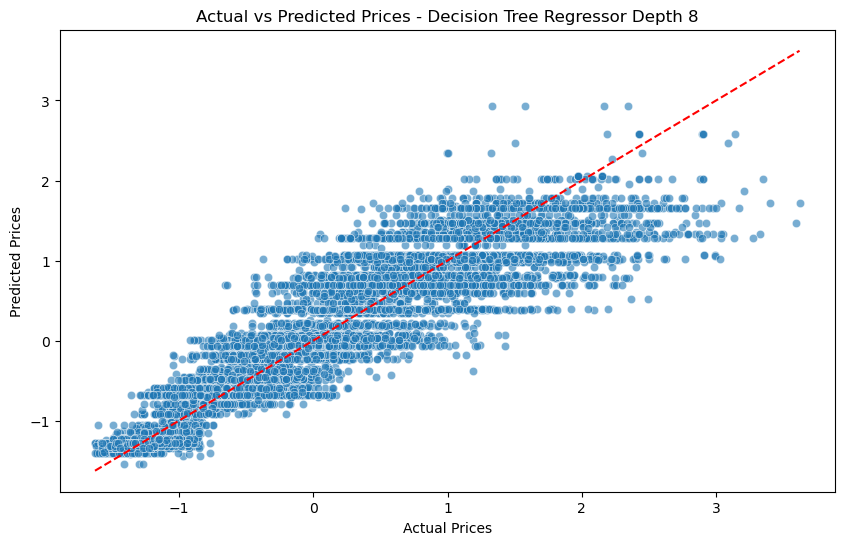

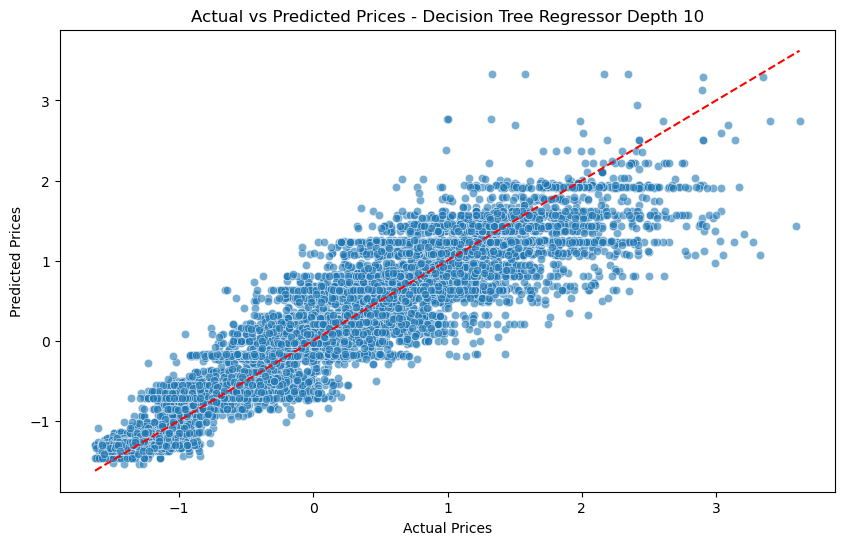

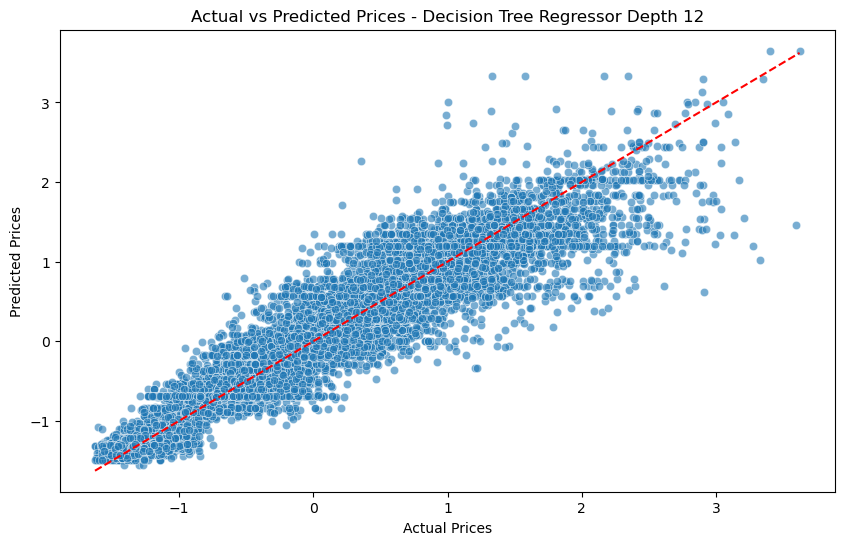

In [47]:
# Keep only numeric columns
df = df.select_dtypes(include=[np.number])

# Remove columns with all NaN values
df = df.dropna(axis=1, how='all')

# Ensure there are no remaining NaN values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Remove columns that are not needed for regression
columns_to_use = ['TTT', 'LOS', 'score',
       'reviews', 'full_price',
       'Free_cancellation', 'No_payment', 'Breakfast', 'Option Member',
       'star_rating', 'location_rating',
       'km_from_center']
df = df[columns_to_use]

# Split the data into train and test sets
X = df.drop(columns=['full_price'])
y = df['full_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models with different depths
depths = [6, 8, 10, 12]
results = []
predictions = {}

for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Training metrics
    train_r2 = r2_score(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    
    # Test metrics
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    results.append({
        'Depth': depth,
        'Train R2': train_r2,
        'Train RMSE': train_rmse,
        'Train MSE': train_mse,
        'Train MAE': train_mae,
        'Test R2': test_r2,
        'Test RMSE': test_rmse,
        'Test MSE': test_mse,
        'Test MAE': test_mae
    })
    
    # Store predictions for plotting
    predictions[f'Depth {depth}'] = (y_test, y_test_pred)

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print("Decision Tree Regressor Results after data normalization:")
print(results_df)

# Plot actual vs predicted prices for each depth
for model_name, (y_test, y_pred) in predictions.items():
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'Actual vs Predicted Prices - Decision Tree Regressor {model_name}')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.show()

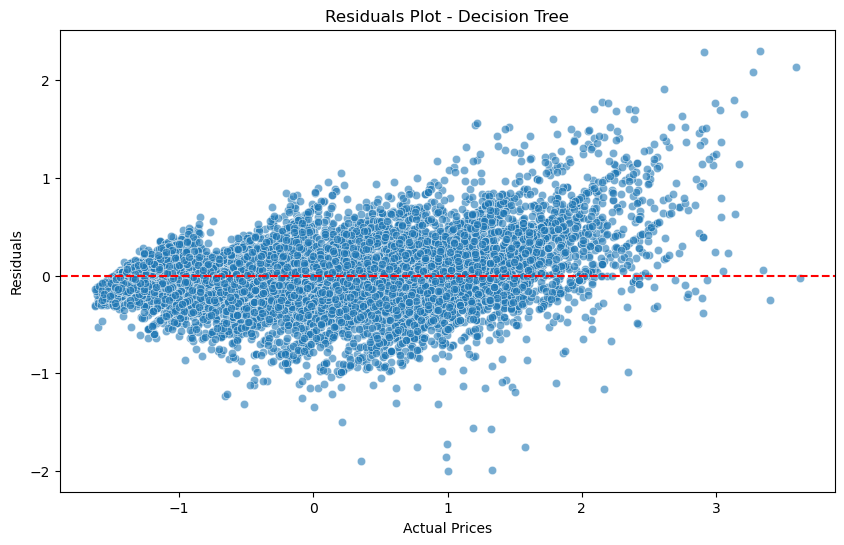

In [48]:
# Residual plot
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title(f'Residuals Plot - Decision Tree')
plt.show()

Error metrics for the additional experiment (Depth 14, TTT split):
Training set - R²: 0.9345033361938098, RMSE: 0.25623318897782, MSE: 0.06565544713374322, MAE: 0.16803920372001602
Test set - R²: 0.8965449341900152, RMSE: 0.3192248561715331, MSE: 0.10190450879773601, MAE: 0.22781021641307567


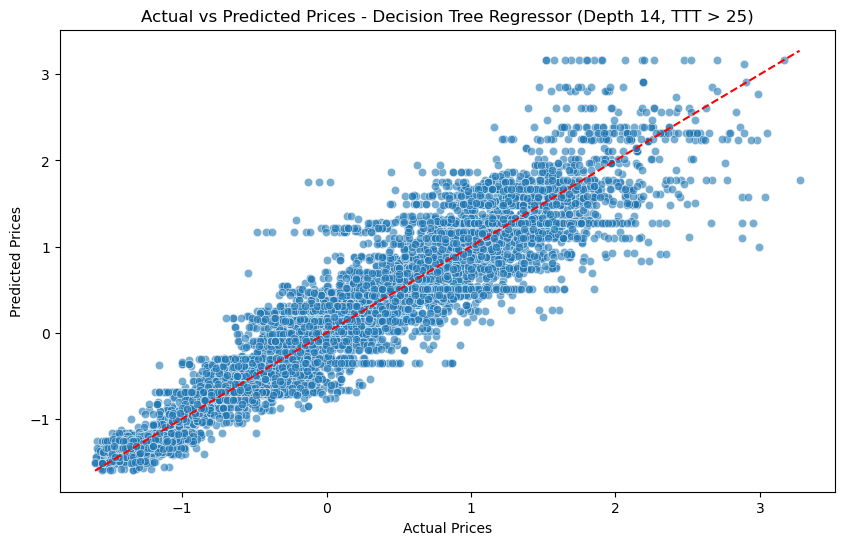

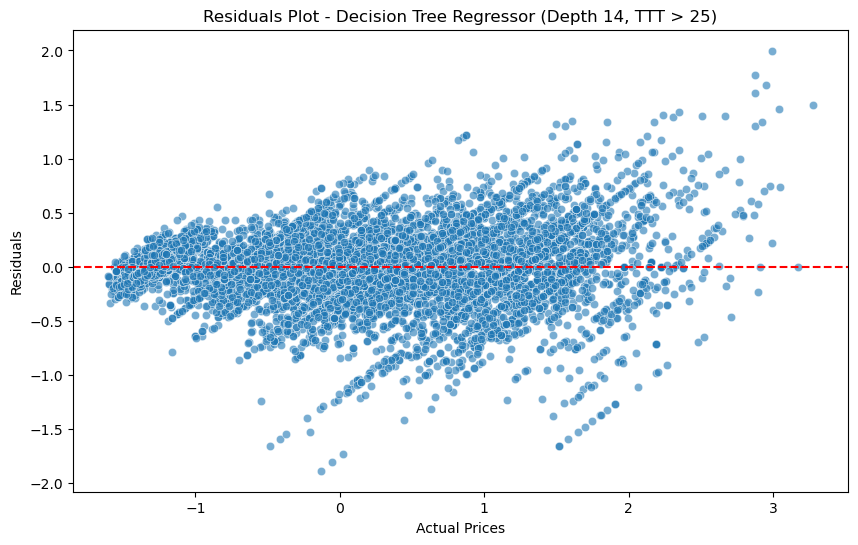

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


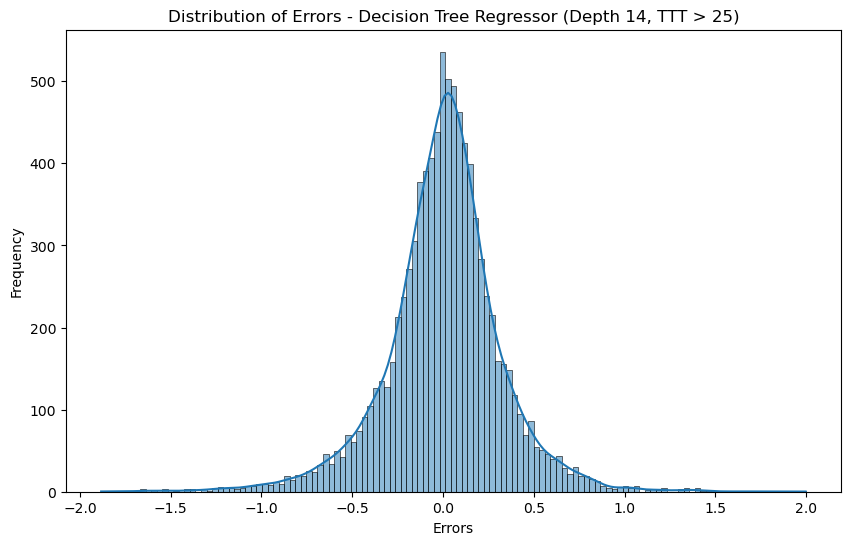

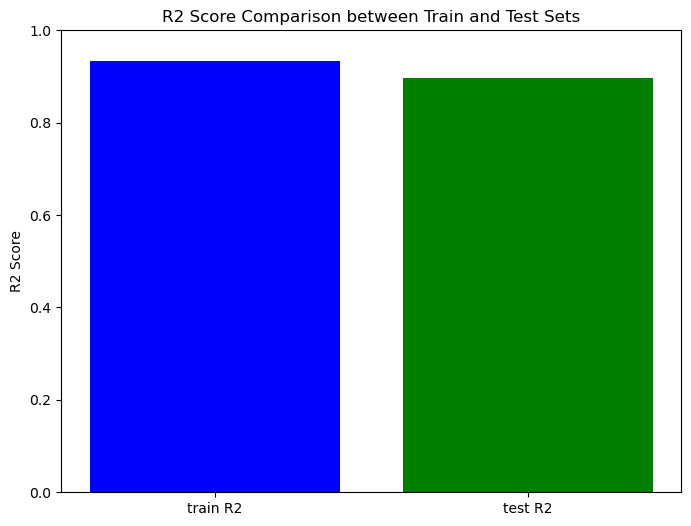

In [50]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Keep only numeric columns
df = df.select_dtypes(include=[np.number])

# Remove columns with all NaN values
df = df.dropna(axis=1, how='all')

# Remove the price column
if 'price_per_night' in df.columns:
    df = df.drop(columns=['price_per_night'])

# Ensure there are no remaining NaN values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


# Additional experiment for depth 14
df_train = df[df['TTT'] <= 25]
df_test = df[df['TTT'] > 25]

X_train_exp = df_train.drop(columns=['full_price'])
y_train_exp = df_train['full_price']
X_test_exp = df_test.drop(columns=['full_price'])
y_test_exp = df_test['full_price']

# Train the model on the new train-test split
model_exp = DecisionTreeRegressor(max_depth=14)
model_exp.fit(X_train_exp, y_train_exp)

# Predictions
y_train_exp_pred = model_exp.predict(X_train_exp)
y_test_exp_pred = model_exp.predict(X_test_exp)

# Calculate error metrics for training set
train_r2_exp = r2_score(y_train_exp, y_train_exp_pred)
train_rmse_exp = mean_squared_error(y_train_exp, y_train_exp_pred, squared=False)
train_mse_exp = mean_squared_error(y_train_exp, y_train_exp_pred)
train_mae_exp = mean_absolute_error(y_train_exp, y_train_exp_pred)

# Calculate error metrics for test set
test_r2_exp = r2_score(y_test_exp, y_test_exp_pred)
test_rmse_exp = mean_squared_error(y_test_exp, y_test_exp_pred, squared=False)
test_mse_exp = mean_squared_error(y_test_exp, y_test_exp_pred)
test_mae_exp = mean_absolute_error(y_test_exp, y_test_exp_pred)

# Print error metrics
print("Error metrics for the additional experiment (Depth 14, TTT split):")
print(f"Training set - R²: {train_r2_exp}, RMSE: {train_rmse_exp}, MSE: {train_mse_exp}, MAE: {train_mae_exp}")
print(f"Test set - R²: {test_r2_exp}, RMSE: {test_rmse_exp}, MSE: {test_mse_exp}, MAE: {test_mae_exp}")

# Plot actual vs predicted prices for depth 14 with new split
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_exp, y=y_test_exp_pred, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices - Decision Tree Regressor (Depth 14, TTT > 25)')
plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()], color='red', linestyle='--')
plt.show()

# Residual plot
residuals_exp = y_test_exp - y_test_exp_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_exp, y=residuals_exp, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residuals Plot - Decision Tree Regressor (Depth 14, TTT > 25)')
plt.show()

# Plot  error distribution for depth 14 with new split
errors_exp = y_test_exp - y_test_exp_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors_exp, kde=True)
plt.xlabel('Errors')
plt.ylabel('Frequency')
plt.title('Distribution of Errors - Decision Tree Regressor (Depth 14, TTT > 25)')
plt.show()


r2_values = [train_r2_exp, test_r2_exp]
labels = ['train R2', 'test R2']

plt.figure(figsize=(8, 6))
plt.bar(labels, r2_values, color=['blue', 'green'])
plt.ylim(0, 1)  
plt.ylabel('R2 Score')
plt.title('R2 Score Comparison between Train and Test Sets')
plt.show()

In [51]:
# Load the data
df1 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_clean_df_normalized_with_features_engineering_20_06.csv")
df2 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_clean_df_normalized_with_features_engineering_25_06.csv")
df3 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_clean_df_normalized_with_features_engineering_05_07.csv")

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True)

Decision Tree Regressor Results with feature engineering and after data normalization:
   Depth  Train R2  Train RMSE  Train MSE  Train MAE   Test R2  Test RMSE  \
0      6  0.871956    0.358071   0.128215   0.261554  0.864319   0.367714   
1      8  0.892202    0.328546   0.107942   0.238311  0.882735   0.341850   
2     10  0.916877    0.288504   0.083234   0.206644  0.901141   0.313877   
3     12  0.942733    0.239465   0.057344   0.166807  0.913659   0.293333   
4     13  0.954427    0.213620   0.045633   0.145423  0.918628   0.284766   
5     14  0.964839    0.187637   0.035208   0.122831  0.918621   0.284778   

   Test MSE  Test MAE  
0  0.135214  0.269252  
1  0.116862  0.249205  
2  0.098519  0.226790  
3  0.086044  0.209344  
4  0.081092  0.202942  
5  0.081099  0.199447  


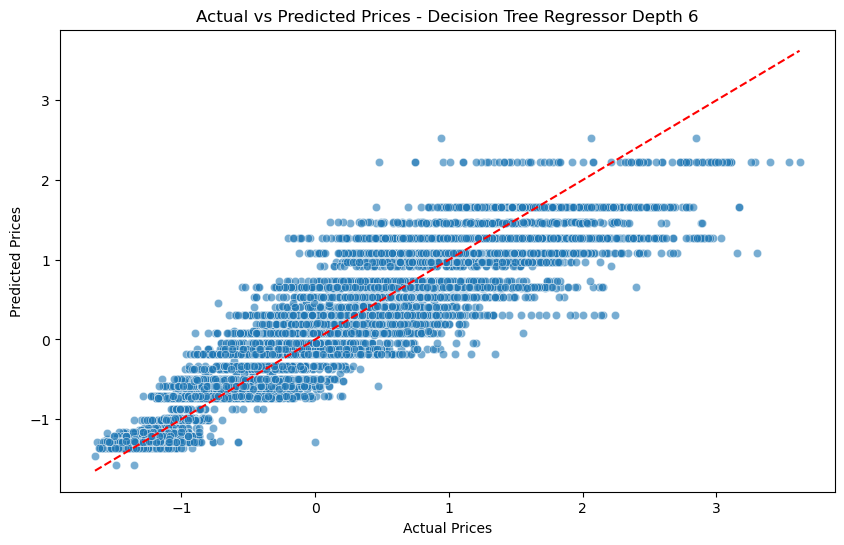

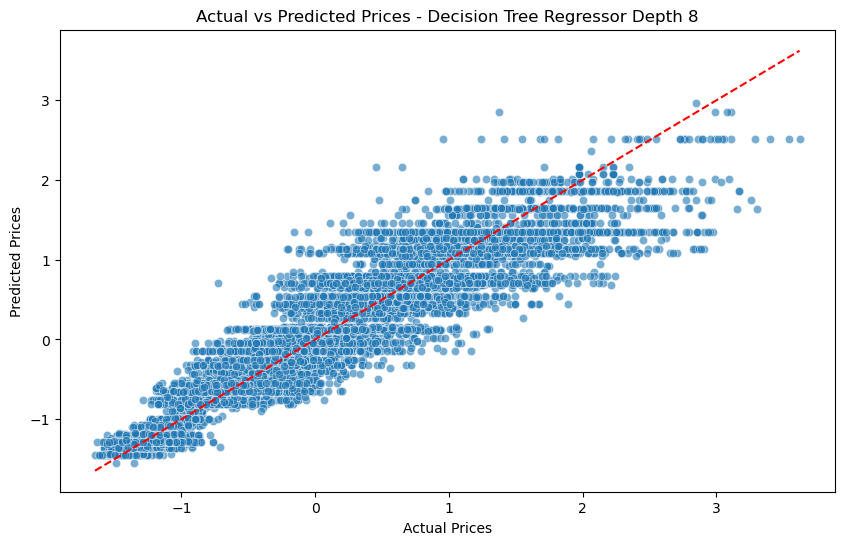

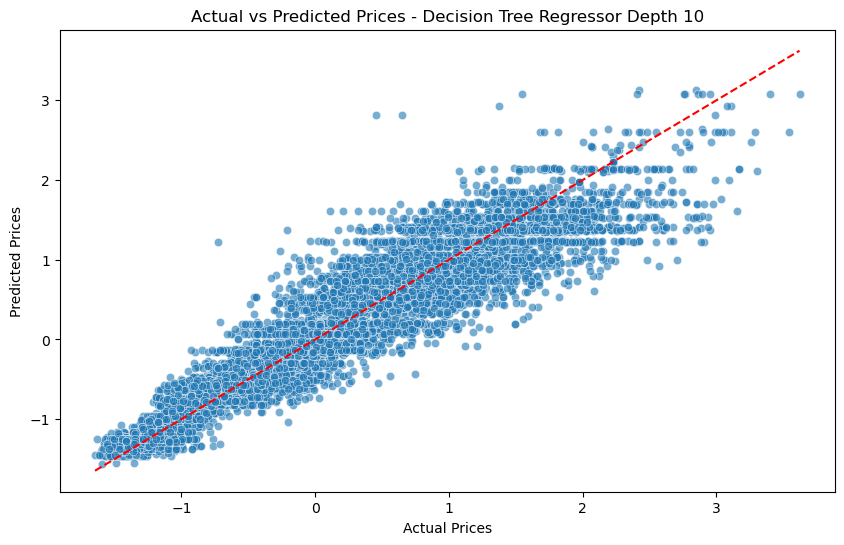

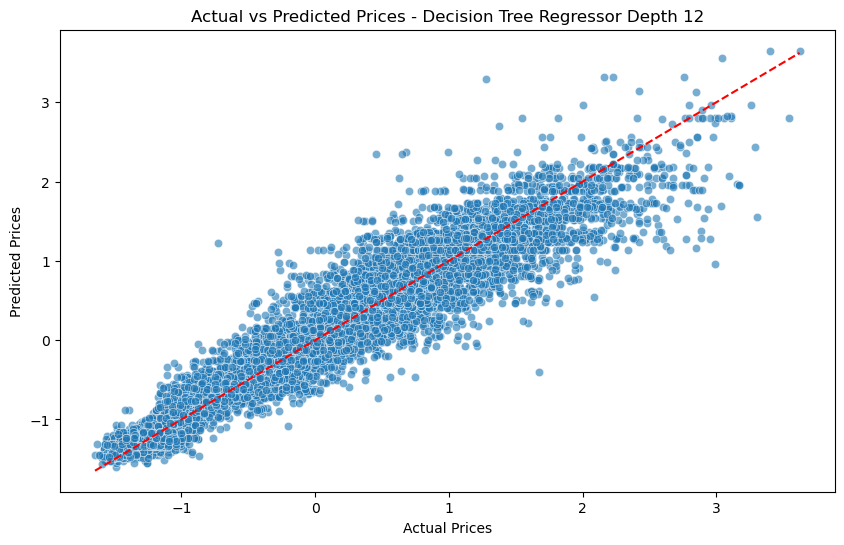

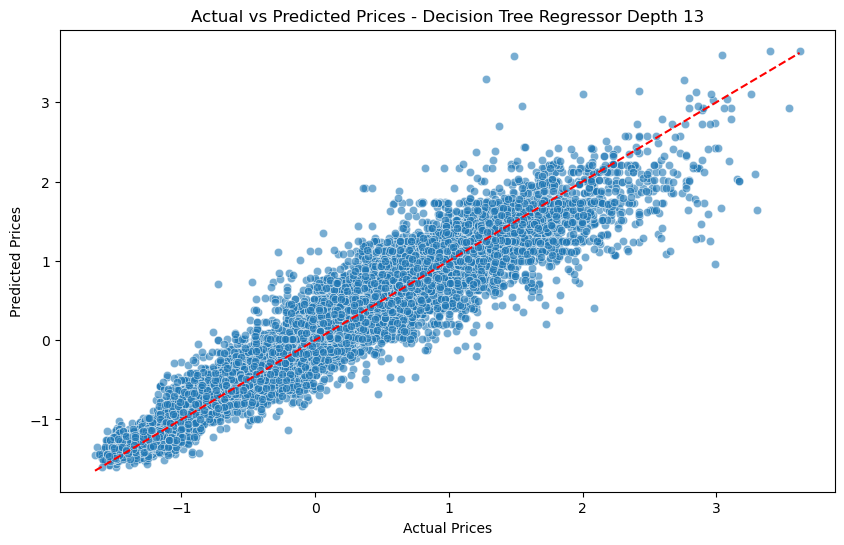

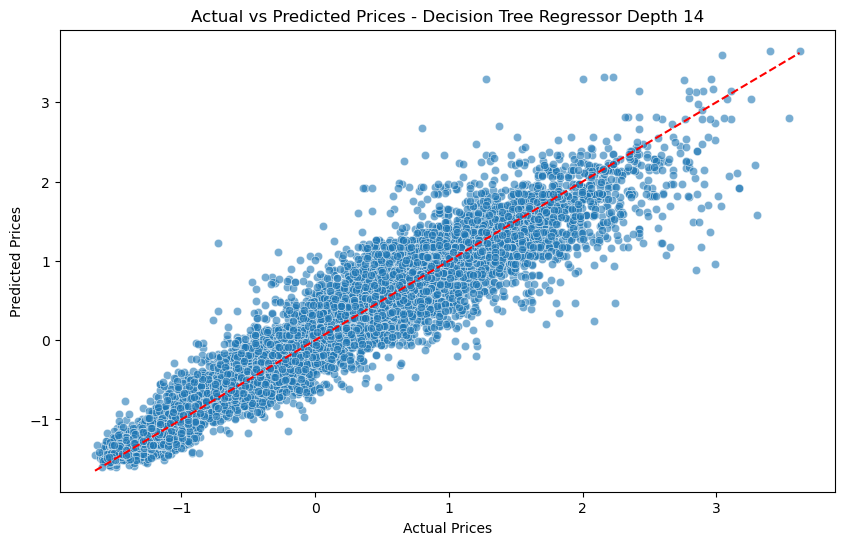

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Merge the dataframes
# df = pd.concat([df1, df2, df3], ignore_index=True)

# Remove columns that are not needed for regression
columns_to_use = ['TTT', 'LOS', 'score',
       'reviews', 'full_price',
       'Free_cancellation', 'No_payment', 'Breakfast', 'Option Member',
       'star_rating', 'location_rating',
       'km_from_center', 'checkin_day', 'checkout_day', 'checkin_day_name_Friday',
       'checkin_day_name_Monday', 'checkin_day_name_Saturday',
       'checkin_day_name_Sunday', 'checkin_day_name_Thursday',
       'checkin_day_name_Tuesday', 'checkin_day_name_Wednesday',
       'checkin_day_name_nan', 'checkout_day_name_Friday',
       'checkout_day_name_Monday', 'checkout_day_name_Saturday',
       'checkout_day_name_Sunday', 'checkout_day_name_Thursday',
       'checkout_day_name_Tuesday', 'checkout_day_name_Wednesday',
       'checkout_day_name_nan', 'period_of_the_month_beginning of the month',
       'period_of_the_month_end of the month',
       'period_of_the_month_middle of the month']
df = df[columns_to_use]

# Keep only numeric columns
df = df.select_dtypes(include=[np.number])

# Remove columns with all NaN values
df = df.dropna(axis=1, how='all')

# Ensure there are no remaining NaN values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Split the data into train and test sets
X = df.drop(columns=['full_price'])
y = df['full_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models with different depths
depths = [6, 8, 10, 12,13,14]
results = []
predictions = {}

for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Training metrics
    train_r2 = r2_score(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    
    # Test metrics
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    results.append({
        'Depth': depth,
        'Train R2': train_r2,
        'Train RMSE': train_rmse,
        'Train MSE': train_mse,
        'Train MAE': train_mae,
        'Test R2': test_r2,
        'Test RMSE': test_rmse,
        'Test MSE': test_mse,
        'Test MAE': test_mae
    })
    
    # Store predictions for plotting
    predictions[f'Depth {depth}'] = (y_test, y_test_pred)

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print("Decision Tree Regressor Results with feature engineering and after data normalization:")
print(results_df)

# Plot actual vs predicted prices for each depth
for model_name, (y_test, y_pred) in predictions.items():
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'Actual vs Predicted Prices - Decision Tree Regressor {model_name}')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.show()

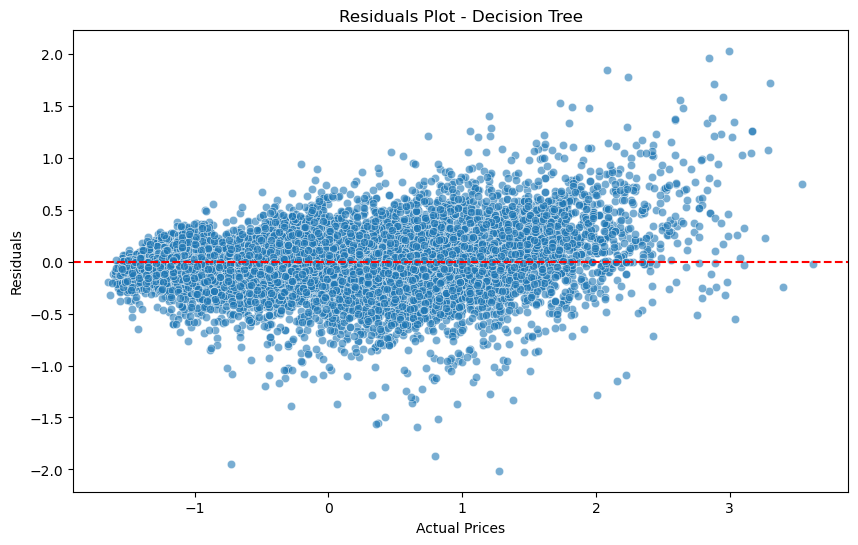

In [53]:
# Residual plot
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title(f'Residuals Plot - Decision Tree')
plt.show()

Error metrics for the additional experiment (Depth 14, TTT split):
Training set - R²: 0.9607359562458485, RMSE: 0.19839161130158423, MSE: 0.03935923143483888, MAE: 0.12734245381974466
Test set - R²: 0.8655922553561632, RMSE: 0.36385886977393034, MSE: 0.13239327711316198, MAE: 0.26483944356231565


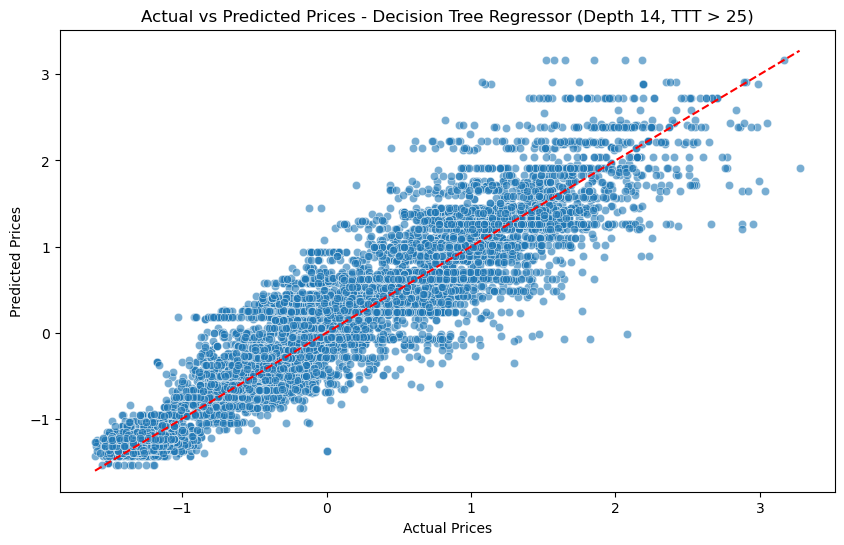

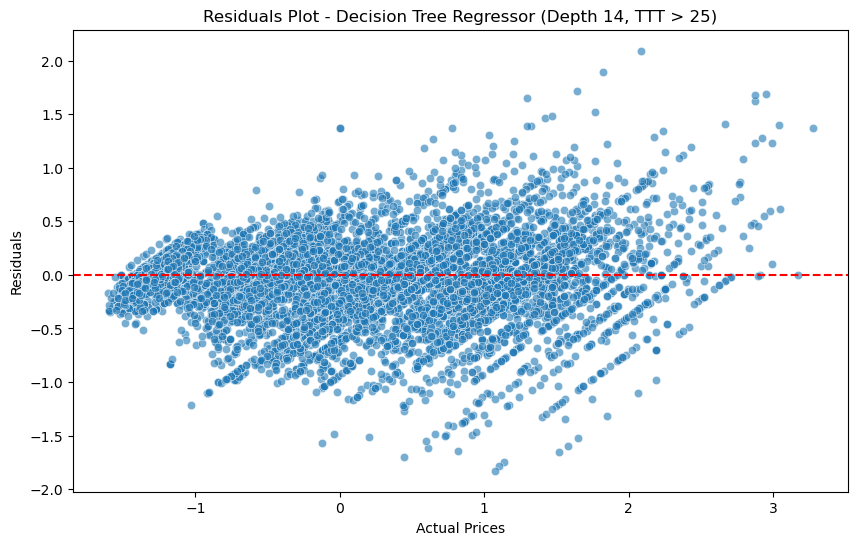

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


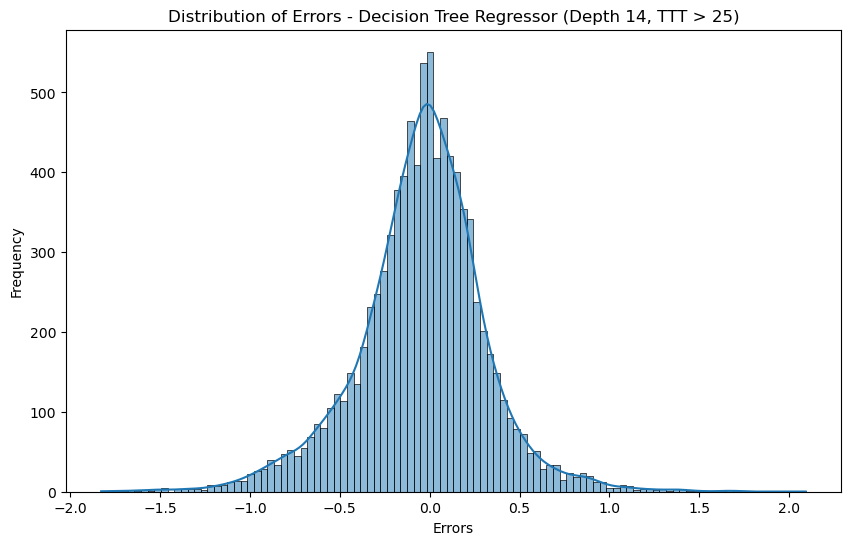

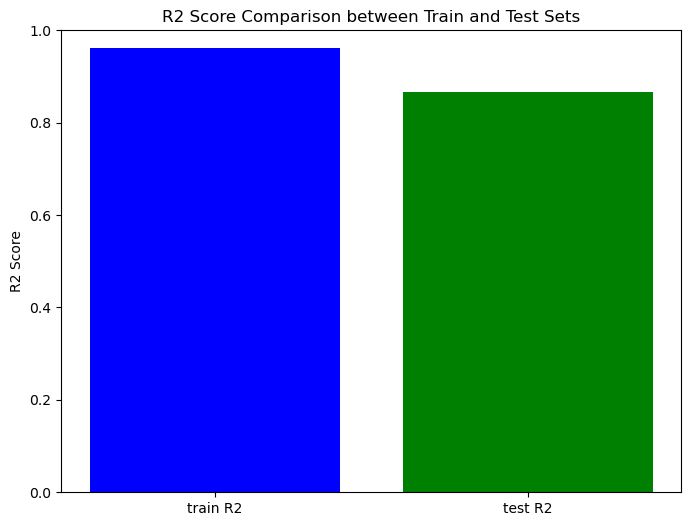

In [54]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Keep only numeric columns
df = df.select_dtypes(include=[np.number])

# Remove columns with all NaN values
df = df.dropna(axis=1, how='all')

# Remove the price column
if 'price_per_night' in df.columns:
    df = df.drop(columns=['price_per_night'])

# Ensure there are no remaining NaN values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


# Additional experiment for depth 14
df_train = df[df['TTT'] <= 25]
df_test = df[df['TTT'] > 25]

X_train_exp = df_train.drop(columns=['full_price'])
y_train_exp = df_train['full_price']
X_test_exp = df_test.drop(columns=['full_price'])
y_test_exp = df_test['full_price']

# Train the model on the new train-test split
model_exp = DecisionTreeRegressor(max_depth=14)
model_exp.fit(X_train_exp, y_train_exp)

# Predictions
y_train_exp_pred = model_exp.predict(X_train_exp)
y_test_exp_pred = model_exp.predict(X_test_exp)

# Calculate error metrics for training set
train_r2_exp = r2_score(y_train_exp, y_train_exp_pred)
train_rmse_exp = mean_squared_error(y_train_exp, y_train_exp_pred, squared=False)
train_mse_exp = mean_squared_error(y_train_exp, y_train_exp_pred)
train_mae_exp = mean_absolute_error(y_train_exp, y_train_exp_pred)

# Calculate error metrics for test set
test_r2_exp = r2_score(y_test_exp, y_test_exp_pred)
test_rmse_exp = mean_squared_error(y_test_exp, y_test_exp_pred, squared=False)
test_mse_exp = mean_squared_error(y_test_exp, y_test_exp_pred)
test_mae_exp = mean_absolute_error(y_test_exp, y_test_exp_pred)

# Print error metrics
print("Error metrics for the additional experiment (Depth 14, TTT split):")
print(f"Training set - R²: {train_r2_exp}, RMSE: {train_rmse_exp}, MSE: {train_mse_exp}, MAE: {train_mae_exp}")
print(f"Test set - R²: {test_r2_exp}, RMSE: {test_rmse_exp}, MSE: {test_mse_exp}, MAE: {test_mae_exp}")

# Plot actual vs predicted prices for depth 14 with new split
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_exp, y=y_test_exp_pred, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices - Decision Tree Regressor (Depth 14, TTT > 25)')
plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()], color='red', linestyle='--')
plt.show()

# Residual plot
residuals_exp = y_test_exp - y_test_exp_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_exp, y=residuals_exp, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residuals Plot - Decision Tree Regressor (Depth 14, TTT > 25)')
plt.show()

# Plot  error distribution for depth 14 with new split
errors_exp = y_test_exp - y_test_exp_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors_exp, kde=True)
plt.xlabel('Errors')
plt.ylabel('Frequency')
plt.title('Distribution of Errors - Decision Tree Regressor (Depth 14, TTT > 25)')
plt.show()


r2_values = [train_r2_exp, test_r2_exp]
labels = ['train R2', 'test R2']

plt.figure(figsize=(8, 6))
plt.bar(labels, r2_values, color=['blue', 'green'])
plt.ylim(0, 1)  
plt.ylabel('R2 Score')
plt.title('R2 Score Comparison between Train and Test Sets')
plt.show()

# Summery of Decision Tree Regressor Results
* Initial Decision Tree Regressor Model
* Depth 6:
    1. Train R2: 0.8096
    2. Train RMSE: 174.78
    3. Train MSE: 30,549.24
    4. Train MAE: 123.06
    5. Test R2: 0.8084
    6. Test RMSE: 175.37
    7. Test MSE: 30,752.91
    8. Test MAE: 124.02
* Depth 8:
    1. Train R2: 0.8298
    2. Train RMSE: 165.25
    3. Train MSE: 27,307.23
    4. Train MAE: 115.67
    5. Test R2: 0.8242
    6. Test RMSE: 167.95
    7. Test MSE: 28,208.45
    8. Test MAE: 118.07
*Depth 10:
    1. Train R2: 0.8505
    2. Train RMSE: 154.88
    3. Train MSE: 23,986.87
    4. Train MAE: 106.63
    5. Test R2: 0.8347
    6. Test RMSE: 162.88
    7. Test MSE: 26,529.54
    8. Test MAE: 112.95
* Depth 12:
    1. Train R2: 0.8771
    2. Train RMSE: 140.42
    3. Train MSE: 19,716.76
    4. Train MAE: 94.52
    5. Test R2: 0.8486
    6. Test RMSE: 155.88
    7. Test MSE: 24,297.85
    8. Test MAE: 106.56

The initial decision tree model improved with increased depth, showing better fit and lower error metrics as depth increased.

* Decision Tree Regressor with Feature Engineering
* Depth 6:
    1. Train R2: 0.8636
    2. Train RMSE: 137.04
    3. Train MSE: 18,780.22
    4. Train MAE: 98.62
    5. Test R2: 0.8610
    6. Test RMSE: 136.88
    7. Test MSE: 18,735.51
    8. Test MAE: 98.54
Depth 8:
* Train R2: 0.8897
    1. Train RMSE: 123.22
    2. Train MSE: 15,184.33
    3. Train MAE: 88.15
    4. Test R2: 0.8836
    5. Test RMSE: 125.26
    6. Test MSE: 15,689.87
    7. Test MAE: 89.58
* Depth 10:
    1. Train R2: 0.9173
    2. Train RMSE: 106.70
    3. Train MSE: 11,383.84
    4. Train MAE: 75.61
    5. Test R2: 0.9025
    6. Test RMSE: 114.65
    7. Test MSE: 13,143.67
    8. Test MAE: 82.02
* Depth 12:
    1. Train R2: 0.9407
    2. Train RMSE: 90.31
    3. Train MSE: 8,156.55
    4. Train MAE: 61.83
    5. Test R2: 0.9143
    6. Test RMSE: 107.46
    7. Test MSE: 11,547.08
    8. Test MAE: 76.68
* Depth 13:
    1. Train R2: 0.9512
    2. Train RMSE: 81.93
    3. Train MSE: 6,712.10
    4. Train MAE: 54.32
    5. Test R2: 0.9146
    6. Test RMSE: 107.28
    7. Test MSE: 11,508.73
    8. Test MAE: 76.16
* Depth 14:
    1. Train R2: 0.9611
    2. Train RMSE: 73.19
    3. Train MSE: 5,357.38
    4. Train MAE: 46.33
    5. Test R2: 0.9172
    6. Test RMSE: 105.65
    7. Test MSE: 11,161.44
    8. Test MAE: 74.19

Feature engineering significantly improved the model's performance across all depths. The R2 scores increased, and the error metrics (RMSE, MSE, MAE) decreased.

* Decision Tree Regressor with Data Normalization: 
    1. Normalization also improved model performance. The R2 scores and error metrics showed that the normalized data helped the model generalize better.

* Decision Tree Regressor with Feature Engineering and Data Normalization
    1. Combining feature engineering and normalization provided the best performance, with the highest R2 scores and the lowest errors across all depths.

# Conclusion
* Initial Model: Shows reasonable performance, but significant improvements can be made.
* Feature Engineering: Greatly enhances model accuracy and reduces errors.
* Data Normalization: Further improves model performance, especially in terms of generalization.
* Combined Feature Engineering and Normalization: Yields the best overall performance, achieving the highest accuracy and lowest errors.

    
Overall, the decision tree model, especially with feature engineering and normalization, demonstrates strong predictive capabilities and performs best at deeper tree depths.